In [1]:
# import pandas as pd
import math
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint, Callback
# from keras.optimizers import adam
%matplotlib inline
import random
import pandas, numpy
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
# this wrapper makes it possible to train on subset of features
import sklearn
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
from keras.callbacks import EarlyStopping, ModelCheckpoint, Callback
# import xgboost as xgb
from itertools import tee, islice
from ROOT import TFile, TCanvas, TPad, TPaveLabel, TPaveText, TTree, TH1F, TF1
from root_numpy import root2array, tree2array, array2tree, array2root
import sys
from ROOT import gROOT, AddressOf
from root_numpy import root2array, rec2array
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.ticker as ticker
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn import tree


2021-12-22 22:25:47.504648: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-22 22:25:47.504667: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Welcome to JupyROOT 6.22/06


In [2]:
signal = '../../M.sc._Project/data_files/2/output_TprimeBToTH_Hgg_M-600_LH_TuneCP5_PSweights_13TeV-madgraph_pythia8.root'
back = '../../M.sc._Project/data_files/2/output_TTGG_0Jets_TuneCP5_13TeV_amcatnlo_madspin_pythia8.root'
treeName_back ="tagsDumper/trees/ttgg_13TeV_THQLeptonicTag" 
treeName_signal = "tagsDumper/trees/Tprime_600_13TeV_THQLeptonicTag"

In [3]:
columns = ['dipho_pt',
           'dipho_phi',
           'dipho_eta',
           'dipho_e',
           'dipho_mass',
           'dipho_leadPt',
           'dipho_leadEt',
           'dipho_leadEta',
           'dipho_leadPhi',
           'dipho_subleadEta',
           'bjet1_pt',
           'bjet2_pt',
           'bjet1_eta',
           'bjet2_eta',
           'jet1_pt',
           'jet2_pt',
           'jet1_eta',
           'n_jets',
           'n_bjets',
           'bjet2_phi',
           'bjet3_phi',
#            'bjet3_eta',
           'bjet1_discr',
           'bjet2_discr',
           'bjet3_discr',
           'jet3_pt',
#           'jet1_phi',
#          'jet2_phi' ,
          'jet3_phi',
          'jet1_e',
          'jet2_e',
          'jet3_e',
#            'CMS_hgg_mass',
#             'sigmaMoM_decorr',
#             'dipho_sumpt',
#             'dipho_cosphi',
# #             'dipho_mass',
#             'dipho_lead_ptoM',
#             'ele1_pt',
#             'ele2_pt',
#             'ele1_eta',
#             'ele2_eta',
#             'ele1_phi',
#             'ele2_phi',
#             'ele1_e',
#             'ele2_e',
#             'ele1_ch',
#             'ele2_ch',
          ]

In [4]:
mc_arr = root2array(signal, treeName_signal, columns)
data_arr = root2array(back, treeName_back, columns)


In [5]:
# signal_array = rec2array(mc_arr)
# backgr_array = rec2array(data_arr)

In [6]:
signal = pd.DataFrame(mc_arr)
backgr = pd.DataFrame(data_arr)

In [7]:
signal.head()

,dipho_pt,dipho_phi,dipho_eta,dipho_e,dipho_mass,dipho_leadPt,dipho_leadEt,dipho_leadEta,dipho_leadPhi,dipho_subleadEta,...,bjet2_phi,bjet3_phi,bjet1_discr,bjet2_discr,bjet3_discr,jet3_pt,jet3_phi,jet1_e,jet2_e,jet3_e
0,223.705856,-1.323450,0.318467,267.080170,126.641273,199.472260,199.472260,0.084015,-1.190372,1.195149,...,-999.0,-999.0,0.542797,-999.0,-999.0,32.669273,1.569978,95.607208,1191.367432,241.569809
1,260.774780,-0.267662,-0.128844,290.720459,124.014992,217.392303,217.392303,-0.121357,-0.029141,-0.101361,...,-999.0,-999.0,0.638937,-999.0,-999.0,-999.000000,-999.000000,118.092453,414.571472,-999.000000
2,161.275345,1.180603,1.236659,325.605042,123.836288,121.089691,121.089691,0.842742,0.717829,1.373165,...,-999.0,-999.0,0.190941,-999.0,-999.0,38.143219,-0.088661,1073.277710,710.365112,1559.091675
3,180.834686,2.346533,0.262894,223.509109,122.239555,158.326920,158.326920,0.202652,2.675919,0.260665,...,-999.0,-999.0,0.991427,-999.0,-999.0,-999.000000,-999.000000,147.974121,743.884460,-999.000000
4,120.654503,1.938972,0.362926,178.034470,123.026970,139.716736,139.716736,0.194240,1.749266,0.534833,...,-999.0,-999.0,0.998264,-999.0,-999.0,27.921988,-0.433156,181.441132,170.393524,157.808121


In [8]:
backgr.head()

,dipho_pt,dipho_phi,dipho_eta,dipho_e,dipho_mass,dipho_leadPt,dipho_leadEt,dipho_leadEta,dipho_leadPhi,dipho_subleadEta,...,bjet2_phi,bjet3_phi,bjet1_discr,bjet2_discr,bjet3_discr,jet3_pt,jet3_phi,jet1_e,jet2_e,jet3_e
0,52.527027,-1.174143,-1.492155,172.138580,120.741455,87.515839,87.515839,-0.567891,-1.419583,-1.200117,...,-999.000000,-999.000000,0.672848,-999.000000,-999.000000,27.716854,-1.253697,153.137192,52.212936,31.179977
1,123.904205,-1.136592,-0.524487,194.665710,133.856461,116.893532,116.893532,-0.433724,-0.595346,-0.240284,...,1.768778,2.862116,0.990922,0.482325,0.435022,141.182739,1.768778,477.698456,321.817871,479.814301
2,33.838303,-2.227046,-1.026729,131.513138,120.229546,72.416328,72.416328,-0.231969,-1.515335,-0.452563,...,-999.000000,-999.000000,0.940769,-999.000000,-999.000000,26.691938,-0.865705,336.066193,164.827438,28.017111
3,56.823273,2.094174,1.551175,196.795441,138.263870,71.284325,71.284325,0.123813,1.540333,1.868356,...,1.234056,-1.104922,0.982719,0.552487,0.363479,127.808762,-1.104922,379.043549,288.934418,586.748901
4,42.491947,2.864337,0.802026,179.874115,170.635025,93.304108,93.304108,-0.001781,1.891259,0.471199,...,1.322586,-1.081986,0.999948,0.927475,0.721255,34.057114,-0.721865,65.048302,212.025818,456.401398


In [9]:
X = np.concatenate((signal, backgr))
Y = np.concatenate((np.ones(signal.shape[0]),
                    np.zeros(backgr.shape[0])))

In [10]:
Xtrain,Xtest, Ytrain,Ytest = train_test_split(X, Y, test_size=0.33, random_state =5)


In [11]:
Xtest.shape, Xtest.shape

((45164, 29), (45164, 29))

In [52]:
Ytest

array([1., 1., 1., ..., 1., 0., 1.])

In [12]:
Xtrain.shape, Ytrain.shape

((91696, 29), (91696,))

In [13]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import keras
from keras.layers import Dropout
from keras.constraints import maxnorm
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
# from keras.optimizers import SGD
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.utils.vis_utils import plot_model
from keras.layers import LSTM

In [14]:
# define model for training

clf = Sequential()
# clf.add(LSTM(1, return_sequences=True ))
clf.add(Dropout(0.3,input_shape = (29,)))
clf.add(Dense(200, activation = 'relu', kernel_initializer = 'lecun_uniform',name = 'dense_1'))
clf.add(Dense(100, activation = 'relu', kernel_initializer = 'lecun_uniform', name = 'dense_2'))
clf.add(Dense(100, activation = 'relu', kernel_initializer = 'lecun_uniform', name = 'dense_3'))
clf.add(Dense(100, activation = 'relu', kernel_initializer = 'lecun_uniform',name = 'dense_4'))
clf.add(Dense(100, activation = 'relu', kernel_initializer = 'lecun_uniform', name = 'dense_5'))
#Output
clf.add(Dense(1, activation = 'sigmoid', kernel_initializer = 'lecun_uniform', name = 'output'))
#compile model
clf.compile(loss = 'binary_crossentropy', 
            optimizer='adam',
            metrics=['accuracy'])
print(clf.summary())
# plot_model(clf, to_file='clf_plot____.png', show_shapes=True, show_layer_names=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 29)                0         
                                                                 
 dense_1 (Dense)             (None, 200)               6000      
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 output (Dense)              (None, 1)                 1

2021-12-22 22:26:24.203292: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-12-22 22:26:24.203328: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-22 22:26:24.203355: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (sraj-OptiPlex-5050): /proc/driver/nvidia/version does not exist
2021-12-22 22:26:24.203665: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
h = clf.fit(Xtrain, Ytrain, epochs = 100, batch_size= 900, validation_split = 0.25)


Epoch 1/100
77/77 [==============================] - 0s 5ms/step - loss: 0.5096 - accuracy: 0.7590 - val_loss: 0.4403 - val_accuracy: 0.8065
Epoch 2/100
77/77 [==============================] - 0s 4ms/step - loss: 0.5030 - accuracy: 0.7639 - val_loss: 0.4324 - val_accuracy: 0.8153
Epoch 3/100
77/77 [==============================] - 0s 4ms/step - loss: 0.5015 - accuracy: 0.7644 - val_loss: 0.4379 - val_accuracy: 0.8218
Epoch 4/100
77/77 [==============================] - 0s 4ms/step - loss: 0.4939 - accuracy: 0.7717 - val_loss: 0.4165 - val_accuracy: 0.8343
Epoch 5/100
77/77 [==============================] - 0s 4ms/step - loss: 0.4924 - accuracy: 0.7719 - val_loss: 0.4212 - val_accuracy: 0.8226
Epoch 6/100
77/77 [==============================] - 0s 4ms/step - loss: 0.4900 - accuracy: 0.7723 - val_loss: 0.4236 - val_accuracy: 0.8281
Epoch 7/100
77/77 [==============================] - 0s 4ms/step - loss: 0.4866 - accuracy: 0.7787 - val_loss: 0.4142 - val_accuracy: 0.8339
Epoch 8/100
7

Epoch 59/100
77/77 [==============================] - 0s 5ms/step - loss: 0.4092 - accuracy: 0.8199 - val_loss: 0.3746 - val_accuracy: 0.8523
Epoch 60/100
77/77 [==============================] - 0s 5ms/step - loss: 0.4062 - accuracy: 0.8240 - val_loss: 0.3561 - val_accuracy: 0.8599
Epoch 61/100
77/77 [==============================] - 0s 5ms/step - loss: 0.4083 - accuracy: 0.8224 - val_loss: 0.3531 - val_accuracy: 0.8594
Epoch 62/100
77/77 [==============================] - 0s 5ms/step - loss: 0.4077 - accuracy: 0.8210 - val_loss: 0.3770 - val_accuracy: 0.8533
Epoch 63/100
77/77 [==============================] - 0s 5ms/step - loss: 0.4040 - accuracy: 0.8250 - val_loss: 0.3903 - val_accuracy: 0.8378
Epoch 64/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3999 - accuracy: 0.8261 - val_loss: 0.3568 - val_accuracy: 0.8606
Epoch 65/100
77/77 [==============================] - 0s 5ms/step - loss: 0.3986 - accuracy: 0.8265 - val_loss: 0.3547 - val_accuracy: 0.8645
Epoch 

In [17]:
import h5py

# hf.create_dataset('dataset_1', h)

In [18]:
from keras.models import model_from_json
model_json = clf.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
#serialize weights to HDF5
clf.save_weights("model.h5")
print("saved model to disk")

saved model to disk


In [19]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [20]:
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(Xtest, Ytest)

1412/1412 [==============================] - 1s 668us/step - loss: 0.2139 - accuracy: 0.9219


In [21]:
# Final evaluation of the model for DNN
# Testing Outputs
scores = clf.evaluate(Xtest, Ytest, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 92.19%


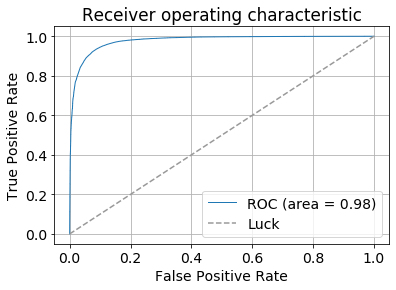

In [25]:
from sklearn.metrics import roc_curve, auc

decisions = clf.predict(Xtest)

# Compute ROC curve and area under the curve
fpr, tpr, thresholds = roc_curve(Ytest, decisions)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.2f)'%(roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.grid()
# plt.savefig("ROC_curve.png")
plt.show()

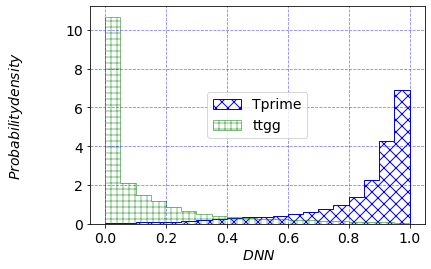

In [27]:
plt.figure()                                     # new window
matplotlib.rcParams.update({'font.size':14})     # set all font sizes
tTest = clf.predict(Xtest)
# if hasattr(clf, "decision_function"):
#     tTest = clf.decision_function(X_test)        # if available use decision_function
# else:
#     tTest = clf.predict_proba(X_test)[:,1]       # for e.g. MLP need to use predict_proba
tBkg = tTest[Ytest==0]
tSig = tTest[Ytest==1]
nBins = 20
tMin = np.floor(np.min(tTest))
tMax = np.ceil(np.max(tTest))
bins = np.linspace(tMin, tMax, nBins+1)
# plt.title('Multilayer perceptron')
plt.xlabel(' $DNN$', labelpad=3)
plt.ylabel('$Probability density$', labelpad=40)
n, bins, patches = plt.hist(tSig, bins=bins, density=True, histtype='step', fill=False, color ='dodgerblue' ,edgecolor = 'blue', hatch = 'XX',label='Tprime')
n, bins, patches = plt.hist(tBkg, bins=bins, density=True, histtype='step', fill=False,color = 'red' ,alpha=0.5, edgecolor = 'green', hatch='++', label = 'ttgg')
plt.grid(color = 'b', alpha = 0.5, linestyle = 'dashed')
plt.legend(loc='center')
# plt.savefig('/eos/home-s/sraj/M.Sc._Thesis/Plot/''output_TPrime_ttgg.png')
plt.show()

https://stackoverflow.com/questions/68971378/attributeerror-sequential-object-has-no-attribute-predict-proba

https://machinelearningmastery.com/save-load-keras-deep-learning-models/

In [31]:
file = '../../M.sc._Project/data_files/2/output_TprimeBToTH_Hgg_M-1200_LH_TuneCP5_PSweights_13TeV-madgraph_pythia8.root'
treeName = "tagsDumper/trees/Tprime_1200_13TeV_THQLeptonicTag"
mc_arr = root2array(file, treeName, columns)


In [32]:
new_data= pd.DataFrame(mc_arr)

In [33]:
new_data


,dipho_pt,dipho_phi,dipho_eta,dipho_e,dipho_mass,dipho_leadPt,dipho_leadEt,dipho_leadEta,dipho_leadPhi,dipho_subleadEta,...,bjet2_phi,bjet3_phi,bjet1_discr,bjet2_discr,bjet3_discr,jet3_pt,jet3_phi,jet1_e,jet2_e,jet3_e
0,595.166260,0.460952,0.627633,727.120056,125.027214,534.582397,534.582397,0.566175,0.515456,0.996379,...,-0.305309,-999.000000,0.985339,0.819623,-999.000000,90.022743,1.954158,312.403442,561.495178,1378.422119
1,456.524109,-0.984099,-0.670740,576.773621,124.728577,287.602081,287.602081,-0.733117,-1.179360,-0.519446,...,-2.950332,1.728448,0.999983,0.505706,0.254300,60.414616,-2.950332,162.035049,365.411346,389.538452
2,474.975677,0.836109,-0.724698,617.692627,123.324104,246.845337,246.845337,-0.460441,0.874362,-0.968103,...,-999.000000,-999.000000,0.999494,-999.000000,-999.000000,-999.000000,-999.000000,304.269562,49.994984,-999.000000
3,587.216736,-2.157246,-0.240816,617.103760,124.927475,530.529053,530.529053,-0.195753,-2.096326,-0.550637,...,-999.000000,-999.000000,0.998836,-999.000000,-999.000000,29.110281,2.931939,320.741150,4055.874268,240.681366
4,458.509705,-2.259718,0.607091,559.567932,124.109444,421.636475,421.636475,0.551736,-2.339284,0.886035,...,-2.705830,0.880687,0.999373,0.948760,0.173882,103.105125,0.585539,708.648315,189.009872,861.765381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107623,161.315857,-3.050623,-1.476128,392.014587,125.482330,111.503784,111.503784,-1.389816,-2.474504,-1.119744,...,-999.000000,-999.000000,0.999093,-999.000000,-999.000000,33.811195,1.056961,683.418518,145.334976,975.211426
107624,589.807739,-2.949610,0.011532,602.403931,122.356056,327.774231,327.774231,0.185660,-2.888549,-0.205096,...,1.249709,-999.000000,0.572935,0.266432,-999.000000,72.391670,-0.389392,468.131500,390.783478,84.628052
107625,495.799530,0.318859,-0.509909,575.459045,125.246063,341.392426,341.392426,-0.325639,0.318161,-0.864598,...,-0.197406,0.712809,0.994960,0.399189,0.256176,43.516449,-0.175971,98.102272,89.682976,92.439125
107626,635.978699,0.249097,0.560497,749.035767,125.071556,426.023132,426.023132,0.455464,0.148389,0.738037,...,2.634934,-999.000000,0.871139,0.658307,-999.000000,75.769859,0.712693,548.496582,1168.835449,518.425415


In [44]:
# print(new_data.columns)

In [37]:
# Dataframe show all columns
print(new_data.keys())

Index(['dipho_pt', 'dipho_phi', 'dipho_eta', 'dipho_e', 'dipho_mass',
       'dipho_leadPt', 'dipho_leadEt', 'dipho_leadEta', 'dipho_leadPhi',
       'dipho_subleadEta', 'bjet1_pt', 'bjet2_pt', 'bjet1_eta', 'bjet2_eta',
       'jet1_pt', 'jet2_pt', 'jet1_eta', 'n_jets', 'n_bjets', 'bjet2_phi',
       'bjet3_phi', 'bjet1_discr', 'bjet2_discr', 'bjet3_discr', 'jet3_pt',
       'jet3_phi', 'jet1_e', 'jet2_e', 'jet3_e'],
      dtype='object')


In [39]:
# Get all names 
for col_name in new_data.columns: 
    print(col_name)

dipho_pt
dipho_phi
dipho_eta
dipho_e
dipho_mass
dipho_leadPt
dipho_leadEt
dipho_leadEta
dipho_leadPhi
dipho_subleadEta
bjet1_pt
bjet2_pt
bjet1_eta
bjet2_eta
jet1_pt
jet2_pt
jet1_eta
n_jets
n_bjets
bjet2_phi
bjet3_phi
bjet1_discr
bjet2_discr
bjet3_discr
jet3_pt
jet3_phi
jet1_e
jet2_e
jet3_e


In [41]:
print(list(new_data.columns))


['dipho_pt', 'dipho_phi', 'dipho_eta', 'dipho_e', 'dipho_mass', 'dipho_leadPt', 'dipho_leadEt', 'dipho_leadEta', 'dipho_leadPhi', 'dipho_subleadEta', 'bjet1_pt', 'bjet2_pt', 'bjet1_eta', 'bjet2_eta', 'jet1_pt', 'jet2_pt', 'jet1_eta', 'n_jets', 'n_bjets', 'bjet2_phi', 'bjet3_phi', 'bjet1_discr', 'bjet2_discr', 'bjet3_discr', 'jet3_pt', 'jet3_phi', 'jet1_e', 'jet2_e', 'jet3_e']


In [43]:
# Dataframe show all columns sorted list
sorted(new_data)


['bjet1_discr',
 'bjet1_eta',
 'bjet1_pt',
 'bjet2_discr',
 'bjet2_eta',
 'bjet2_phi',
 'bjet2_pt',
 'bjet3_discr',
 'bjet3_phi',
 'dipho_e',
 'dipho_eta',
 'dipho_leadEt',
 'dipho_leadEta',
 'dipho_leadPhi',
 'dipho_leadPt',
 'dipho_mass',
 'dipho_phi',
 'dipho_pt',
 'dipho_subleadEta',
 'jet1_e',
 'jet1_eta',
 'jet1_pt',
 'jet2_e',
 'jet2_pt',
 'jet3_e',
 'jet3_phi',
 'jet3_pt',
 'n_bjets',
 'n_jets']

In [58]:
X_1_test =  new_data.loc[62464:].copy()

In [50]:
# X_1_test

In [49]:
X_1_train = new_data.loc[new_data['dipho_pt'] <= 500]
# X_1_train

In [ ]:
Y_test = 

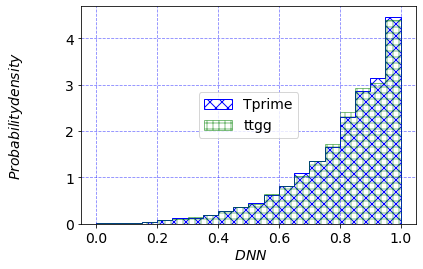

In [59]:
plt.figure()                                     # new window
matplotlib.rcParams.update({'font.size':14})     # set all font sizes
tTest = clf.predict(X_1_test)
# if hasattr(clf, "decision_function"):
#     tTest = clf.decision_function(X_test)        # if available use decision_function
# else:
#     tTest = clf.predict_proba(X_test)[:,1]       # for e.g. MLP need to use predict_proba
tBkg = tTest[Ytest==0]
tSig = tTest[Ytest==1]
nBins = 20
tMin = np.floor(np.min(tTest))
tMax = np.ceil(np.max(tTest))
bins = np.linspace(tMin, tMax, nBins+1)
# plt.title('Multilayer perceptron')
plt.xlabel(' $DNN$', labelpad=3)
plt.ylabel('$Probability density$', labelpad=40)
n, bins, patches = plt.hist(tSig, bins=bins, density=True, histtype='step', fill=False, color ='dodgerblue' ,edgecolor = 'blue', hatch = 'XX',label='Tprime')
n, bins, patches = plt.hist(tBkg, bins=bins, density=True, histtype='step', fill=False,color = 'red' ,alpha=0.5, edgecolor = 'green', hatch='++', label = 'ttgg')
plt.grid(color = 'b', alpha = 0.5, linestyle = 'dashed')
plt.legend(loc='center')
# plt.savefig('/eos/home-s/sraj/M.Sc._Thesis/Plot/''output_TPrime_ttgg.png')
plt.show()

In [56]:
df = new_data.loc[62464:].copy()


In [57]:
df.shape

(45164, 29)